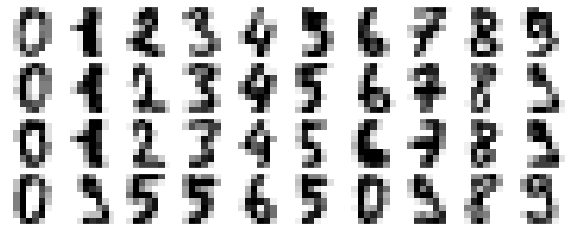

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
 
#SVC(probability=True) has 5-cross validation inside itself
svc = svm.SVC(C=1,probability=True);
pca = PCA(13)
#degree is considered only in 'poly', gamma is ignored in 'linear'
dist=dict(kernel=['linear','rbf','poly'],gamma=['scale','auto',0.5],degree=[1,2,3,4,5,6,7])
pc = pca.fit_transform(digits.data)
clf=RandomizedSearchCV(svc,dist,random_state=0)
search = clf.fit(pc,digits.target)
rat=pca.explained_variance_ratio_.sum()
print(f"coverage: {rat*100}%")
print(f"Best parameters: {clf.best_params_}")
 
print(f"Best score: {clf.best_score_}")
 
sub_dist=dict(gamma=['scale','auto',0.5],degree=[1,2,3,4,5,6,7])
lin_svc=svm.SVC(C=1,kernel='linear',probability=True)
poly_svc=svm.SVC(C=1,kernel='poly',probability=True)
 
best_lin = RandomizedSearchCV(lin_svc,sub_dist,random_state=0).fit(pc,digits.target)
best_poly = RandomizedSearchCV(poly_svc,sub_dist,random_state=0).fit(pc,digits.target)
 
print(f"Best linear parameters: {best_lin.best_params_}")
print(f"Best linear score: {best_lin.best_score_}")
print(f"Best poly parameters: {best_poly.best_params_}")
print(f"Best poly score: {best_poly.best_score_}")

coverage: 80.28932887793746%
Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 6}
Best score: 0.9666233364283503
Best linear parameters: {'gamma': 0.5, 'degree': 3}
Best linear score: 0.9187604456824513
Best poly parameters: {'gamma': 0.5, 'degree': 3}
Best poly score: 0.9516109563602599


In [13]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state = 0)


svc = svm.SVC();
pca = PCA(n_components=0.8)
model = make_pipeline(pca, svc)
param_dist = {
    'svc__C': stats.reciprocal(0.1, 1000), # for linear kernel
    'svc__gamma': stats.reciprocal(0.01, 100), # for radial kernel
    'svc__degree': list(range(0, 10)),  # for polynomial kernel
    'svc__kernel': ['linear', 'rbf', 'poly']
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5)
random_search.fit(X_train, y_train)
pc=pca.fit_transform(X_train)
rat=pca.explained_variance_ratio_.sum()
print(f"coverage: {rat*100}%")

print(f"Best parameters: {random_search.best_params_}")


cross_val_accuracy = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

print(f"Best score: {cross_val_accuracy.mean()}")

sub_param_dist = {
    'C': stats.reciprocal(0.1, 1000), # for linear kernel
    'gamma': stats.reciprocal(0.01, 100), # for radial kernel
    'degree': list(range(0, 10)),  # for polynomial kernel
}
lin_svc=svm.SVC(kernel='linear',probability=True)
rad_svc=svm.SVC(kernel='rbf',probability=True)
poly_svc=svm.SVC(kernel='poly',probability=True)



best_lin = RandomizedSearchCV(lin_svc,sub_param_dist,random_state=0).fit(X_train,y_train)
best_rad = RandomizedSearchCV(rad_svc,sub_param_dist,random_state=0).fit(X_train,y_train)
best_poly = RandomizedSearchCV(poly_svc,sub_param_dist,random_state=0).fit(X_train,y_train)

print(f"Best linear parameters: {best_lin.best_params_}")
print(f"Best linear score: {best_lin.best_score_}")
print(f"Best radial parameters: {best_rad.best_params_}")
print(f"Best radial score: {best_rad.best_score_}")
print(f"Best poly parameters: {best_poly.best_params_}")
print(f"Best poly score: {best_poly.best_score_}")



coverage: 80.54233746822142%
Best parameters: {'svc__C': 14.392890374805265, 'svc__degree': 4, 'svc__gamma': 0.1381300837033221, 'svc__kernel': 'poly'}
Best score: 0.9688172931295608
Best linear parameters: {'C': 15.676677195506059, 'degree': 5, 'gamma': 23.826650493636627}
Best linear score: 0.9814484372848685
Best radial parameters: {'C': 220.9607086872955, 'degree': 8, 'gamma': 0.022310905607443036}
Best radial score: 0.2450117031529671
Best poly parameters: {'C': 0.1204685241203032, 'degree': 3, 'gamma': 67.39390723749764}
Best poly score: 0.9903483409059616
